In [ ]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/19/sr0vg3y90ns0sp5j74zth4h80000gn/T/ipykernel_66434/3356670784.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
# Histogram of prices
plt.hist(data.target)
plt.xlabel("Price ($1000s)")
plt.ylabel("Count")

In [16]:
path = "/Users/thananpornsethjinda/Desktop/internship/ml/regression/housing.csv"

df = pd.read_csv(path, header=None, sep="\s+")

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/19/sr0vg3y90ns0sp5j74zth4h80000gn/T/ipykernel_66434/1215634977.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, header=None, sep="\s+")


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Text(0, 0.5, 'Count')

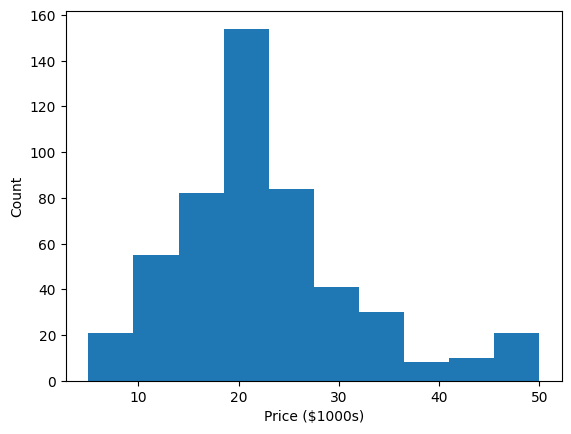

In [ ]:
plt.hist(df['AGE'])
plt.xlabel("Price ($1000s)")
plt.ylabel("Count")

In [91]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

inputs = df[['CRIM']]
target = df.MEDV

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, target, test_size=0.1)

model = LinearRegression().fit(inputs_train, targets_train)

predicted_price = model.predict(inputs_test)

# plt.scatter(inputs, target)

# plt.plot(inputs_test, predicted_price, 'r') # remember x comes first and then y

In [89]:
# metrics 
def metrics(actual_y, predicted_y): 
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import root_mean_squared_error
    from sklearn.metrics import r2_score

    mse = mean_squared_error(actual_y, predicted_y)
    rmse = root_mean_squared_error(actual_y, predicted_y)
    r2 = r2_score(actual_y, predicted_y)

    print(mse, rmse, r2)


In [94]:
metrics(targets_test, predicted_price)

77.98637212542593 8.83098930615511 0.09644779856477192


/Users/thananpornsethjinda/miniconda3/envs/grass/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


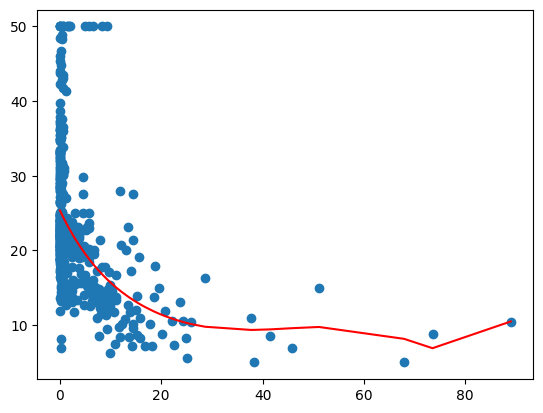

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=6, include_bias=False)
inputs_poly = poly_features.fit_transform(inputs_train)

polynomial_model = LinearRegression().fit(inputs_poly, targets_train)

inputs_sorted = np.sort(inputs.values, axis=0)

predicted_poly = polynomial_model.predict(poly_features.transform(inputs_sorted))

plt.scatter(inputs, target)

plt.plot(inputs_sorted, predicted_poly, 'r') # remember x comes first and then y

In [108]:
metrics(target, predicted_poly)

74.12365468368962 8.609509549544017 0.12196109457659077


In [ ]:
from sklearn.datasets import fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)

df = california_housing.frame

df


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [117]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010
